In [52]:
##import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.model_selection import RepeatedKFold
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import accuracy_score  
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, svm
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  roc_curve
from scipy import stats

Downloading data-sets

In [53]:
## Loading train data-set and name it to Ttrain
Ttrain= pd.read_csv('train.csv')
Ttrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C


In [54]:
## Load the test data
Ttest= pd.read_csv('test.csv')
Ttest

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.05,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00,0,0,PC 17758,108.90,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50,0,0,SOTON/O.Q. 3101262,7.25,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.05,NaN,S


In [55]:
## Load the data of gender
gender= pd.read_csv('gender_submission.csv')
gender

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Getting info and describing datasets

In [56]:
## getting info about the train dataset (Ttrain)
Ttrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [57]:
##Describing  Train data, find mean, median,std,...
Ttrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [58]:
## change the display format
pd.options.display.float_format = '{:.2f}'.format
Ttrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [59]:
## checking missing values
Ttrain.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [60]:
##overview of train data
Ttrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


Cleaning the data-sets

In [61]:
## Removing unnecessary columns(by Modifying the DataFrame, not creating a new DataFrame)

Ttrain = Ttrain.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)


In [76]:
##final data for Ttrain after removing
Ttrain

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.00,1,0,7.25
1,1,1,female,38.00,1,0,71.28
2,1,3,female,26.00,0,0,7.92
3,1,1,female,35.00,1,0,53.10
4,0,3,male,35.00,0,0,8.05
...,...,...,...,...,...,...,...
886,0,2,male,27.00,0,0,13.00
887,1,1,female,19.00,0,0,30.00
888,0,3,female,NaN,1,2,23.45
889,1,1,male,26.00,0,0,30.00


In [63]:
# Detecting duplicates in Train data set(Ttrain)
duplicates =Ttrain[Ttrain.duplicated()]
print(duplicates)


     Survived  Pclass     Sex   Age  SibSp  Parch  Fare
42          0       3    male   NaN      0      0  7.90
47          1       3  female   NaN      0      0  7.75
76          0       3    male   NaN      0      0  7.90
77          0       3    male   NaN      0      0  8.05
87          0       3    male   NaN      0      0  8.05
..        ...     ...     ...   ...    ...    ...   ...
877         0       3    male 19.00      0      0  7.90
878         0       3    male   NaN      0      0  7.90
881         0       3    male 33.00      0      0  7.90
884         0       3    male 25.00      0      0  7.05
886         0       2    male 27.00      0      0 13.00

[114 rows x 7 columns]


In [64]:
## Detecting duplicates in Ttest data set(Ttest)
Ttest.drop_duplicates()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.05,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00,0,0,PC 17758,108.90,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50,0,0,SOTON/O.Q. 3101262,7.25,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.05,NaN,S


In [65]:
## Removing unnecessary columns(by Modifying the DataFrame, not creating a new DataFrame)

Ttest = Ttest.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [66]:
# Assuming we have independents(x_train, x_test) and target (y_train, y_test)
##Dropping column'Survived' from x-train as we want it to make it dependent, so remove it from x-axis and make it as y-axis

x_train = Ttrain.drop('Survived', axis=1)
y_train = Ttrain['Survived']
## Insert 'Survived' column into test data

In [67]:
##overview of test set after removing unnnecessary columns and inserting 'Survived ' column as dependent 
Ttest

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.50,0,0,7.83
1,3,female,47.00,1,0,7.00
2,2,male,62.00,0,0,9.69
3,3,male,27.00,0,0,8.66
4,3,female,22.00,1,1,12.29
...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.05
414,1,female,39.00,0,0,108.90
415,3,male,38.50,0,0,7.25
416,3,male,NaN,0,0,8.05


In [68]:
## final data for Ttest after removing unnecessary columns
Ttest

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.50,0,0,7.83
1,3,female,47.00,1,0,7.00
2,2,male,62.00,0,0,9.69
3,3,male,27.00,0,0,8.66
4,3,female,22.00,1,1,12.29
...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.05
414,1,female,39.00,0,0,108.90
415,3,male,38.50,0,0,7.25
416,3,male,NaN,0,0,8.05


In [69]:

# Detecting duplicates from test data
Ttest.drop_duplicates()
print(duplicates)

     Survived  Pclass     Sex   Age  SibSp  Parch  Fare
42          0       3    male   NaN      0      0  7.90
47          1       3  female   NaN      0      0  7.75
76          0       3    male   NaN      0      0  7.90
77          0       3    male   NaN      0      0  8.05
87          0       3    male   NaN      0      0  8.05
..        ...     ...     ...   ...    ...    ...   ...
877         0       3    male 19.00      0      0  7.90
878         0       3    male   NaN      0      0  7.90
881         0       3    male 33.00      0      0  7.90
884         0       3    male 25.00      0      0  7.05
886         0       2    male 27.00      0      0 13.00

[114 rows x 7 columns]


##The message above shows there is no duplicated rows
The message below show the DataFrame after excuting the removing duplicated rows( weathere there was duplictaed or not)


In [70]:
## insert the survived column from the gender dat set into the test data
Ttest.insert(1, 'Survived', gender['Survived']) 

In [73]:
##overview of Ttest
Ttest.head()

,Pclass,Survived,Sex,Age,SibSp,Parch,Fare
0,3,0,male,34.50,0,0,7.83
1,3,1,female,47.00,1,0,7.00
2,2,0,male,62.00,0,0,9.69
3,3,0,male,27.00,0,0,8.66
4,3,1,female,22.00,1,1,12.29


In [74]:
# Detecting duplicates from test data
Ttest.drop_duplicates()
print(duplicates)

     Survived  Pclass     Sex   Age  SibSp  Parch  Fare
42          0       3    male   NaN      0      0  7.90
47          1       3  female   NaN      0      0  7.75
76          0       3    male   NaN      0      0  7.90
77          0       3    male   NaN      0      0  8.05
87          0       3    male   NaN      0      0  8.05
..        ...     ...     ...   ...    ...    ...   ...
877         0       3    male 19.00      0      0  7.90
878         0       3    male   NaN      0      0  7.90
881         0       3    male 33.00      0      0  7.90
884         0       3    male 25.00      0      0  7.05
886         0       2    male 27.00      0      0 13.00

[114 rows x 7 columns]


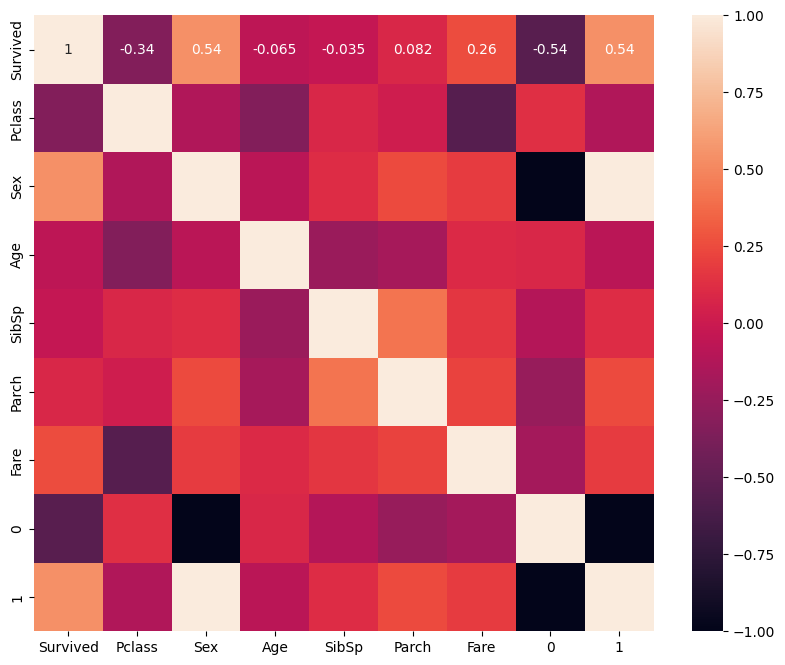

In [189]:
##Exploratory data analysis
##Correlation matrix for train data

corr_mat = Ttrain.corr(numeric_only= True)
corr_mat
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True)
plt.show()

##Filling blanks (null)(NaN) in Age and Fare columns with Medaian                                 
##changing objects (Male, Female) inSex to integer (0,1)

In [190]:
## Filling null values in Age columns with median values
Ttrain['Age'] = Ttrain['Age'].fillna(Ttrain['Age'].median())
Ttest['Age'] = Ttest['Age'].fillna(Ttest['Age'].median())

In [191]:
## Filling null values in Fare column in test data with median values
Ttest['Fare'] = Ttest['Fare'].fillna(Ttest['Fare'].median())

In [192]:
## Filling null values in Age columns with median values
Ttrain['Sex'] = Ttrain['Sex'].fillna(Ttrain['Sex'].median())
Ttest['Sex'] = Ttest['Sex'].fillna(Ttest['Sex'].median())

In [82]:
## One-hot encoding the Sex column in training data//////Another way to change the object to number
encoded_data = pd.get_dummies(Ttrain['Sex'], dtype=int)
Ttrain= pd.merge(Ttrain, encoded_data, left_index=True, right_index=True)
Ttrain.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,0,1
0,0,3,0,22.00,1,0,7.25,1,0
1,1,1,1,38.00,1,0,71.28,0,1
2,1,3,1,26.00,0,0,7.92,0,1
3,1,1,1,35.00,1,0,53.10,0,1
4,0,3,0,35.00,0,0,8.05,1,0


##The following code is also for converting objcet (male, female ) to int(0,1) but I already used encoded coded( I just want to have this here)

In [ ]:
## Changing objects (stings), male and female to numbers, respectively 0 1nd 
Ttrain['Sex'] = Ttrain['Sex'].map({'male': 0, 'female': 1}).astype(int)
Ttest['Sex'] = Ttest['Sex'].map({'male': 0, 'female': 1}).astype(int)
#this code can not handle the missing values, I can use one-hot encoding

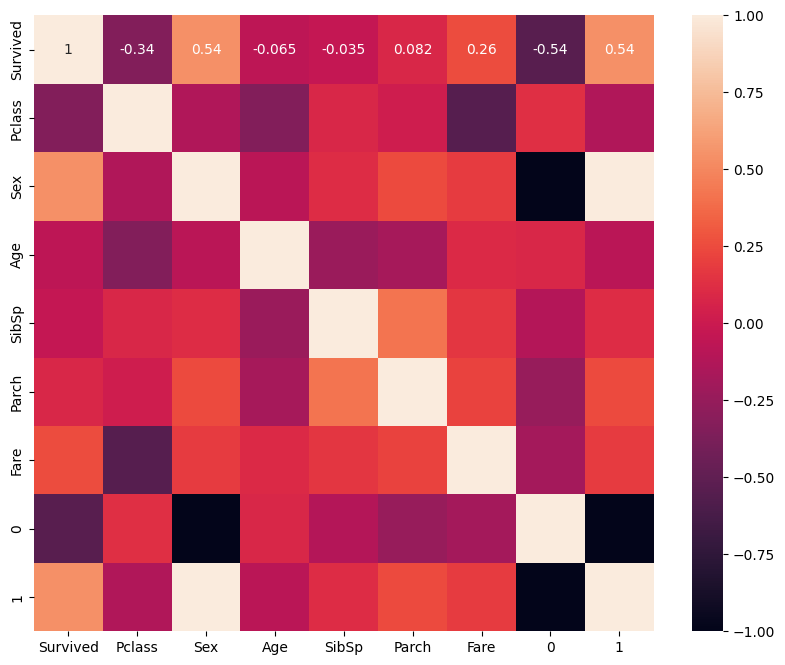

In [83]:
##Exploratory data analysis
##Correlation matrix for train data

corr_mat = Ttrain.corr(numeric_only= True)
corr_mat
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True)
plt.show()

<Axes: >

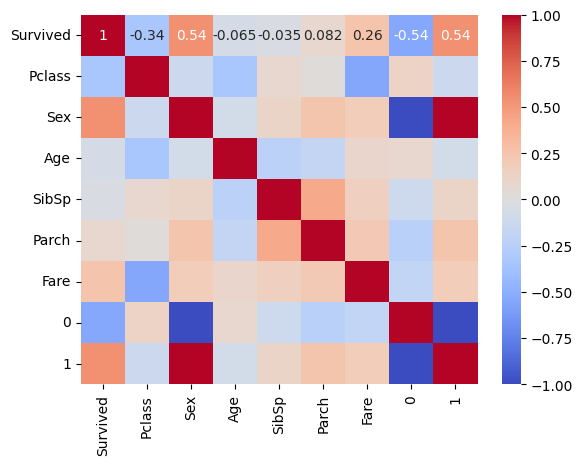

In [84]:
###Heat Map
## Plot the heatmap
corr_mat = Ttrain.corr(numeric_only = True)
sns.heatmap(corr_mat, annot=True, cmap=sns.color_palette("coolwarm", as_cmap=True))

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Figure size 800x600 with 0 Axes>

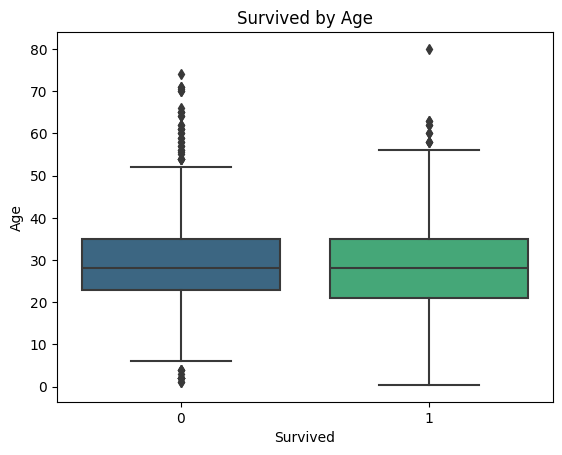

<Figure size 800x600 with 0 Axes>

In [85]:
##visulising outliers
sns.boxplot(x='Survived', y='Age', data= Ttrain, palette='viridis')
plt.title('Survived by Age')
plt.figure(figsize=(8, 6))



c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Fare')

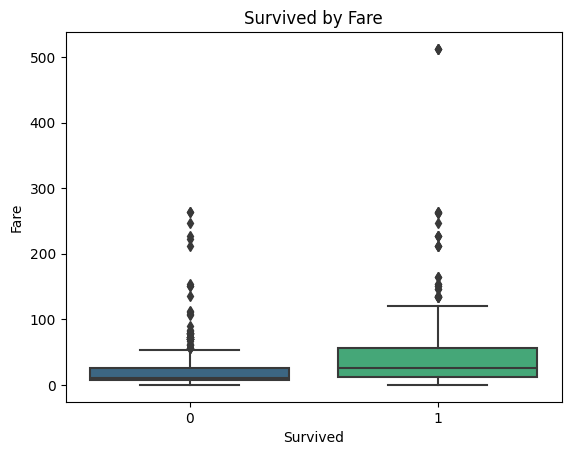

In [86]:
## Visualising outliers using BOX Plot, outliers Fair and Survived
sns.boxplot(x='Survived', y='Fare', data= Ttrain, palette='viridis')

plt.title('Survived by Fare')
plt.xlabel('Survived')
plt.ylabel('Fare')


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Survived')

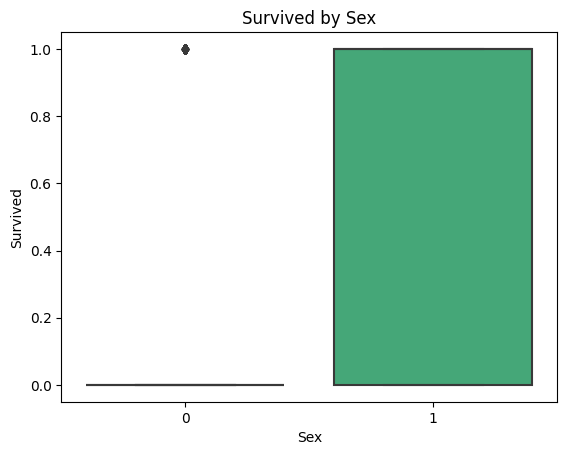

In [87]:
##visulising outliers- Sex 
sns.boxplot(x='Sex', y='Survived', data= Ttrain, palette='viridis')

plt.title('Survived by Sex')
plt.xlabel('Sex')
plt.ylabel('Survived')

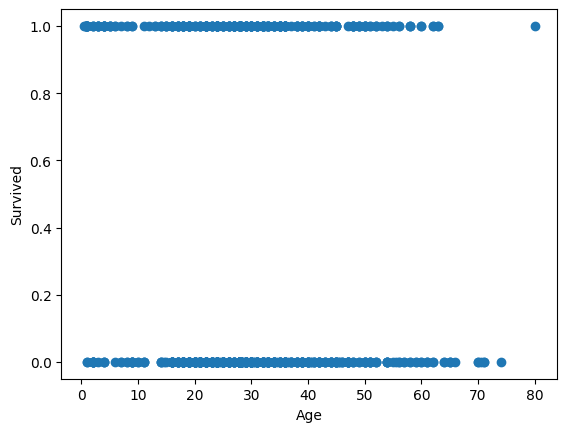

In [88]:
# TRAIN data --scatter plot to see the relationship 
plt.scatter(Ttrain['Age'], Ttrain['Survived'])
## label the axes
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

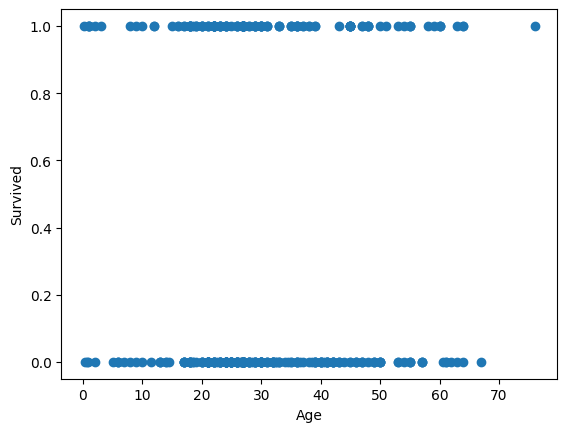

In [89]:
##testdata --scatter plot to see the relationship 

plt.scatter(Ttest['Age'], Ttest['Survived'])
## label the axes
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

##Logistic Regression's algorithm's model for 'Fare' as independent vs SUrvived as dependent

In [90]:
## Fare vs. Survived
##Prepare our feature matrix (x) and target variable (y) for both datasets
x_train = Ttrain['Fare'].values.reshape(-1, 1)
y_train = Ttrain['Survived']
x_test = Ttest['Fare'].values.reshape(-1, 1)
y_test = Ttest['Survived']

In [91]:
data = {'Fare': x_train.flatten(), 'Survived': y_train}
new_dataframe = pd.DataFrame(data)
print(new_dataframe)

     Fare  Survived
0    7.25         0
1   71.28         1
2    7.92         1
3   53.10         1
4    8.05         0
..    ...       ...
886 13.00         0
887 30.00         1
888 23.45         0
889 30.00         1
890  7.75         0

[891 rows x 2 columns]


In [92]:
## Creating and fitting the model
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [93]:
y_test

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [94]:
## make prediction
y_pred = log_reg.predict(x_test)

In [95]:
## make this in a dataframe
pd.DataFrame({'Actual_Survived': y_test, 'Predicted_Survived':y_pred})

,Actual_Survived,Predicted_Survived
0,0,0
1,1,0
2,0,0
3,0,0
4,1,0
...,...,...
413,0,0
414,1,1
415,0,0
416,0,0


In [124]:
## model evaluation
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6363636363636364


## Logistic Regression's algorithm's model for Age as independent vs Survived as dependent

In [125]:
# Update x_train and y_train
x_train = Ttrain['Age'].values.reshape(-1, 1)
y_train = Ttrain['Survived']
x_test =Ttest['Age'].values.reshape(-1,1)
y_test = Ttest['Survived']

In [126]:
# Create an imputer, Impute missing values with Median
imputer = SimpleImputer(strategy='median')
##Fit and transform the imputer on our training data and test data
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

In [127]:
## standard scalling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [128]:
## Creating and fitting the model
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [131]:
## make prediction
##make prediction
y_pred_log = log_reg.predict(x_test)
y_pred = log_reg.predict(x_test)

In [132]:
## make this in a Dataframe
pd.DataFrame({'Actual_Survived': y_test, 'Predicted_Survived':y_pred_log})

,Actual_Survived,Predicted_Survived
0,0,0
1,1,0
2,0,0
3,0,0
4,1,0
...,...,...
413,0,0
414,1,0
415,0,0
416,0,0


In [133]:
##model evaluation

print('Accuracy:', metrics.accuracy_score(y_test, y_pred_log))

Accuracy: 0.6363636363636364


##Logistic Regression's algorithm's model for 'Sex' as independent vs SUrvived as dependent

In [134]:
# Prepare our feature matrix (x) and target variable (y) for both datasets
x_train = Ttrain['Sex'].values.reshape(-1, 1)
y_train = Ttrain['Survived']
x_test = Ttest['Sex'].values.reshape(-1, 1)
y_test =Ttest['Survived']

In [135]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.fit_transform(x_test)

In [136]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [137]:
##make prediction
y_pred_log = log_reg.predict(x_test)

In [138]:
import pandas as pd

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'Actual_Survived': y_test, 'Predicted_Survived': y_pred_log})


In [139]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [140]:
##make prediction
y_pred_log = log_reg.predict(x_test)

In [144]:
##model evaluation

print('Accuracy:', metrics.accuracy_score(y_test, y_pred_log))

Accuracy: 1.0


##this is another way to find out the accuracy (below, using confusion mat)

In [ ]:
from sklearn.metrics import confusion_matrix
## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[238,  28],
       [120,  32]], dtype=int64)

In [141]:
import pandas as pd

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'Actual_Survived': y_test, 'Predicted_Survived': y_pred_log})


In [142]:
y_pred = log_reg.predict(x_test)
#report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
print('Accuracy: ', accuracy)
print('Report: ', report)
print('Confusion Matrix: ', confusion_matrix)

Accuracy:  1.0
Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       152

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418

Confusion Matrix:  [[266   0]
 [  0 152]]


## NAIVE BAYS algorithm's model for 'Age' as independent vs SUrvived as dependent

In [145]:
## Our data into features and target variable
x_train = Ttrain['Age'].values.reshape(-1, 1)
y_train = Ttrain['Survived']
x_test = Ttest['Age'].values.reshape(-1, 1)

In [146]:
# Impute missing values with Median
imputer = SimpleImputer(strategy='median')
x_test = imputer.fit_transform(x_test)

In [147]:
## standard scalling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [148]:
## Create Naive Bays Gaussian Model

gausian_model = GaussianNB()
## train our model
gausian_model.fit(x_train, y_train)

GaussianNB()

In [149]:
## make prediction
y_pred = gausian_model.predict(x_test)

In [150]:
## make this in a dataframe
pd.DataFrame({'Actual_Survive': y_test, 'Predicted_Survive':y_pred})

,Actual_Survive,Predicted_Survive
0,0,0
1,1,0
2,0,0
3,0,0
4,1,0
...,...,...
413,0,0
414,1,0
415,0,0
416,0,0


In [151]:
## model evaluation
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6435406698564593


## NAIVE BAYS algorithm's model for 'Fare' as independent vs SUrvived as dependent

In [152]:
# Prepare our feature ( Fare) matrix (x) and target variable (y)(Survived) for both datasets
x_train = Ttrain['Fare'].values.reshape(-1, 1)
y_train = Ttrain['Survived']
x_test = Ttest['Fare'].values.reshape(-1, 1)
y_test = Ttest['Survived']

In [153]:
# Impute missing values with Median
imputer = SimpleImputer(strategy='median')
x_test = imputer.fit_transform(x_test)

In [155]:
## Create Naive Bays Gaussian Model

gausian_model = GaussianNB()
## train our model
gausian_model.fit(x_train, y_train)

GaussianNB()

In [156]:
## make prediction
y_pred = gausian_model.predict(x_test)

In [157]:
## make this in a dataframe
pd.DataFrame({'Actual_Survive': y_test, 'Predicted_Survive':y_pred})

,Actual_Survive,Predicted_Survive
0,0,0
1,1,0
2,0,0
3,0,0
4,1,0
...,...,...
413,0,0
414,1,0
415,0,0
416,0,0


In [159]:
## model evaluation
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6363636363636364


## Logistic Regression algorithm's model for 'Parch' as independent vs SUrvived as dependent

In [154]:
# Prepare our feature matrix (x) and target variable (y) for both datasets
x_train = Ttrain['Parch'].values.reshape(-1, 1)
y_train = Ttrain['Survived']
x_test = Ttest['Parch'].values.reshape(-1, 1)
y_test = Ttest['Survived']

In [ ]:
data = {'Parch': x_train.flatten(), 'Survived': y_train}
new_dataframe = pd.DataFrame(data)
print(new_dataframe)


     Parch  Survived
0        0         0
1        0         1
2        0         1
3        0         1
4        0         0
..     ...       ...
886      0         0
887      0         1
888      2         0
889      0         1
890      0         0

[891 rows x 2 columns]


In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)


LogisticRegression()

In [ ]:
## make prediction
y_pred = log_reg.predict(x_test)


In [ ]:
## make this in a dataframe
pd.DataFrame({'Actual_Survived': y_test, 'Predicted_Survived':y_pred})


,Actual_Survived,Predicted_Survived
0,0,0
1,1,0
2,0,0
3,0,0
4,1,0
...,...,...
413,0,0
414,1,0
415,0,0
416,0,0


In [ ]:
## model evaluation
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.638755980861244


## NAIVE BAYS algorithm's model for 'Parch' as independent vs Survived as dependent

In [ ]:
# Prepare our feature matrix (x) and target variable (y) for both datasets
x_train = Ttrain['Parch'].values.reshape(-1, 1)
y_train = Ttrain['Survived']
x_test = Ttest['Parch'].values.reshape(-1, 1)
y_test = Ttest['Survived']

In [ ]:
## Create Naive Bays Gaussian Model

gausian_model = GaussianNB()
## train our model
gausian_model.fit(x_train, y_train)


GaussianNB()

In [ ]:
## make prediction
y_pred = gausian_model.predict(x_test)


In [ ]:
## make this in a dataframe
pd.DataFrame({'Actual_Survive': y_test, 'Predicted_Survive':y_pred})


,Actual_Survive,Predicted_Survive
0,0,0
1,1,0
2,0,0
3,0,0
4,1,0
...,...,...
413,0,0
414,1,0
415,0,0
416,0,0


In [ ]:
## model evaluation
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6363636363636364


## Logistic Regression algorithm's model for COMBINED OF 5 FEATURES as independent vs Survived as dependent

In [ ]:
# Prepare 5 features , combined together, as x and Survived as y, dependent feature
x_train = Ttrain[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].values
y_train = Ttrain['Survived']
x_test = Ttest[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].values
y_test = Ttest['Survived']

In [ ]:
# Create an imputer and fit it on your training data
imputer = SimpleImputer(strategy='mean')
imputer.fit(x_train)

SimpleImputer()

In [ ]:
# Transform both your training and testing data
x_train = imputer.transform(x_train)
x_test = imputer.transform(x_test)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
## make prediction
y_pred_log = log_reg.predict(x_test)

In [ ]:
# make this in a dataframe
pd.DataFrame({'Actual_Survived': y_test, 'Predicted_Survived':y_pred_log})

,Actual_Survived,Predicted_Survived
0,0,0
1,1,0
2,0,0
3,0,0
4,1,0
...,...,...
413,0,0
414,1,1
415,0,0
416,0,0


In [ ]:
## model evaluation
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_log))

Accuracy: 0.6339712918660287


## Naive Bays algorithm's model for COMBINED OF 5 FEATURES as independent vs Survived as dependent

In [168]:
# Prepare 5 features , combined together, as x and Survived as y, dependent feature
x_train = Ttrain[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].values
y_train = Ttrain['Survived']
x_test = Ttest[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].values
y_test = Ttest['Survived']

In [169]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)

In [170]:
# Transform both your training and testing data
x_train = imputer.transform(x_train)
x_test = imputer.transform(x_test)

In [171]:
## standard scalling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [172]:
# Create Naive Bays Gaussian Model

gausian_model = GaussianNB()
## train our model
gausian_model.fit(x_train, y_train)

GaussianNB()

In [173]:
## make prediction
y_pred = gausian_model.predict(x_test)

In [175]:
## make this in a dataframe
pd.DataFrame({'Actual_Survived': y_test, 'Predicted_Survived':y_pred})

,Actual_Survived,Predicted_Survived
0,0,0
1,1,0
2,0,0
3,0,0
4,1,0
...,...,...
413,0,0
414,1,1
415,0,0
416,0,0


In [176]:
## model evaluation
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_log))

Accuracy: 1.0


## KNN algorithm's model for 'Fare' as independent vs SUrvived as dependent

In [ ]:
## Our data into features and target variable
x_train = Ttrain['Fare'].values.reshape(-1, 1)
y_train = Ttrain['Survived']
x_test = Ttest['Fare'].values.reshape(-1, 1)
y_test = Ttest['Survived']

In [ ]:
## standard scalling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:
## knn
knn_model = KNeighborsClassifier(n_neighbors = 3)
# Fit the model to your training data
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [177]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Create an imputer
imputer = SimpleImputer(strategy='mean')

# KNN 
knn = KNeighborsClassifier(n_neighbors=5)  # You can choose an appropriate value for 'n_neighbors'

# Fit the model to your training data
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [179]:
# Make predictions on the test data
predictions_knn = knn.predict(x_test)

In [181]:
# Evaluate the model's performance
accuracy = knn.score(x_test, y_test)

print('Accuracy KNN:', metrics.accuracy_score(y_test, predictions_knn))

Accuracy KNN: 0.5741626794258373


## KNN algorithm's model for COMBINED OF 5 Featuresas independent vs Survived as dependent

In [182]:
# Prepare 5 features , combined together, as x and Survived as y, dependent feature
x_train = Ttrain[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].values
y_train = Ttrain['Survived']
x_test = Ttest[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].values
y_test = Ttest['Survived']

In [183]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)


In [184]:
# Transform both your training and testing data
x_train = imputer.transform(x_train)
x_test = imputer.transform(x_test)

In [185]:
## standard scalling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [186]:
## knn
knn_model = KNeighborsClassifier(n_neighbors = 3)
# Fit the model to your training data
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [187]:
# Make predictions on the test data
predictions_knn = knn_model.predict(x_test)

In [188]:
# Evaluate the model's performance
accuracy = knn_model.score(x_test, y_test)

print('Accuracy KNN:', metrics.accuracy_score(y_test, predictions_knn))

Accuracy KNN: 0.5358851674641149
